Imagine que você tem um conjunto de dados que contém as notas de alunos de três turmas diferentes, registradas em diferentes formatos (algumas em números de 0 a 10, outras em letras como A, B, C).

Seu objetivo é analisar o desempenho dos alunos de todas as turmas juntos. Quais passos você seguiria para transformar e combinar esses dados, permitindo uma análise precisa e padronizada? Descreva as etapas que você realizaria e as ferramentas que utilizaria, com base nos conceitos aprendidos.



Exemplo de Resposta Padronizada

Caro cursista, para resolver o problema apresentado, você deve seguir os seguintes passos:

1. Identificação e Transformação dos Dados:
- Primeiro, identifique as diferentes formas de registro das notas (números e letras). Utilize a técnica de substituição para transformar as notas em letras (A, B, C) para uma escala numérica correspondente (por exemplo, A = 10, B = 8, C = 6). Essa transformação é essencial para padronizar os dados, garantindo que todas as notas estejam na mesma escala numérica e facilitando a análise conjunta.


2. Padronização dos Dados:
- Após a substituição, verifique se todas as notas estão dentro de uma escala uniforme. Se necessário, aplique uma técnica de normalização para ajustar as notas a uma escala comum, como de 0 a 10. Isso é importante para assegurar que as notas sejam comparáveis entre as turmas, evitando distorções na análise.


3. Combinação dos Conjuntos de Dados:
- Utilize a função concat() do pandas para combinar os registros de notas das três turmas em um único DataFrame. Essa etapa permite que você una todos os dados em um único conjunto, possibilitando uma análise conjunta das turmas.

4. Análise e Visualização dos Dados:
- Com os dados padronizados e combinados, você pode proceder com a análise. Crie gráficos usando matplotlib ou seaborn para visualizar o desempenho geral das turmas, como um gráfico de distribuição para observar a dispersão das notas ou um gráfico de barras comparando a média de cada turma.

Seguindo essas etapas, você garantirá que os dados estejam preparados de forma padronizada e combinados corretamente, permitindo uma análise precisa e informativa sobre o desempenho dos alunos das três turmas.



In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

turma1 = pd.DataFrame({
    'Aluno': ['A1', 'A2', 'A3', 'A4', 'A5'],
    'Nota': [7.5, 8.0, 6.5, 9.0, 8.5],
    'Turma': ['Turma1']*5
})

turma2 = pd.DataFrame({
    'Aluno': ['B1', 'B2', 'B3', 'B4', 'B5'],
    'Nota': ['A', 'B', 'A', 'C', 'A'],
    'Turma': ['Turma2']*5
})

turma3 = pd.DataFrame({
    'Aluno': ['C1', 'C2', 'C3', 'C4', 'C5'],
    'Nota': [8.5, 7.0, 9.5, 6.0, 5.0],
    'Turma': ['Turma3']*5
})


Passo 1 - Identificação e Transformação dos Dados:

In [32]:
# Criar mapeamento de notas em letras para números
mapeamento_nota = {
    'A': 10.0,
    'B': 8.0,
    'C': 6.0,
    'D': 4.0,
    'E': 2.0,
    'F': 0.0
}

# Aplicar transformação na turma2 que usa notas em letras
turma2['Nota'] = turma2['Nota'].map(mapeamento_nota)


Passo 2 -  Padronização dos Dados

In [33]:
# Verificar e ajustar notas para escala uniforme de 0-10
def normalizar_notas(notas):
    return ((notas - notas.min()) / (notas.max() - notas.min())) * 10

turma1['Nota'] = normalizar_notas(turma1['Nota'])
turma2['Nota'] = normalizar_notas(turma2['Nota'])
turma3['Nota'] = normalizar_notas(turma3['Nota'])


Passo 3 - Combinação dos Conjuntos de Dados

In [34]:
# Usar concat() para unir os dados das três turmas
df_combined = pd.concat([turma1, turma2, turma3], ignore_index=True)
df_combined


,Aluno,Nota,Turma
0,A1,4.000000,Turma1
1,A2,6.000000,Turma1
2,A3,0.000000,Turma1
3,A4,10.000000,Turma1
4,A5,8.000000,Turma1
5,B1,10.000000,Turma2
6,B2,5.000000,Turma2
7,B3,10.000000,Turma2
8,B4,0.000000,Turma2
9,B5,10.000000,Turma2


Passo 4 - Análise e Visualização

Text(0.5, 1.0, 'Densidade das Notas por Turma')

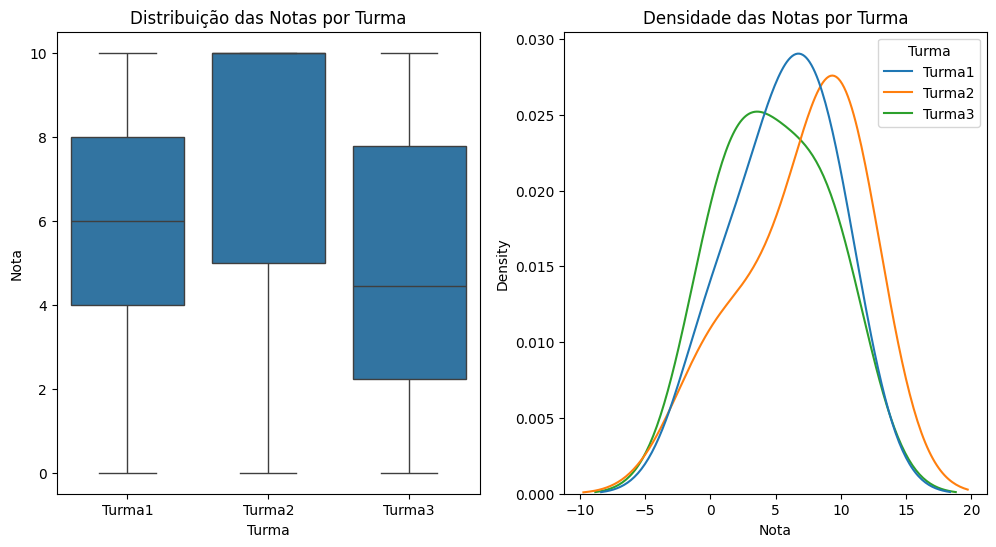

In [35]:
# Criar visualizações
plt.figure(figsize=(12, 6))

# Gráfico de distribuição das notas por turma
plt.subplot(1, 2, 1)
sns.boxplot(x='Turma', y='Nota', data=df_combined)
plt.title('Distribuição das Notas por Turma')

# Gráfico de densidade das notas
plt.subplot(1, 2, 2)
sns.kdeplot(data=df_combined, x='Nota', hue='Turma')
plt.title('Densidade das Notas por Turma')


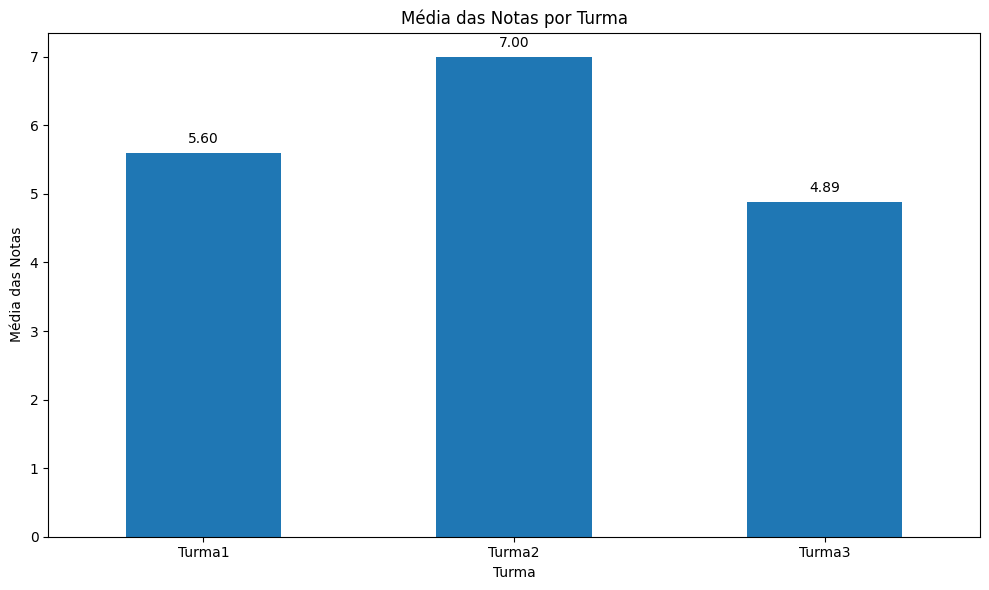

In [36]:
# Gráfico de barras das médias por turma
plt.figure(figsize=(10, 6))
medias_turmas = df_combined.groupby('Turma')['Nota'].mean()
ax = medias_turmas.plot(kind='bar')
ax.bar_label(ax.containers[0], fmt='%.2f', padding=5)
plt.xticks(rotation=0)
plt.title('Média das Notas por Turma')
plt.xlabel('Turma')
plt.ylabel('Média das Notas')
plt.tight_layout()
plt.show()
